# Tema 5

In [70]:
%load_ext asymagic

Q.<i,j,k> = QuaternionAlgebra(QQ,-1,-1)

def euler(psi,theta,phi):
    """
    Retorna la matriu en la base canònica de la rotació de V_3 amb angles
    d'Euler psi, theta o phi.
    """
    A = matrix(3,3,[cos(psi),-sin(psi),0,sin(psi),cos(psi),0,0,0,1])
    B = matrix(3,3,[1,0,0,0,cos(theta),-sin(theta),0,sin(theta),cos(theta)])
    C = matrix(3,3,[cos(phi),-sin(phi),0,sin(phi),cos(phi),0,0,0,1])
    return C * B * A

def quaternio_a_rotacio(a,b,c,d):
    """
    Retorna la matriu en la base canònica de la rotació de V_3 corresponent
    al quaternió unitari q = a + bi + cj + dk
    """
    return simplificar_radicals(matrix([[2*a^2+2*b^2-1,2*b*c-2*a*d,2*a*c+2*b*d],
                                        [2*a*d+2*b*c,2*a^2+2*c^2-1,2*c*d-2*a*b],
                                        [2*b*d-2*a*c,2*a*b+2*c*d,2*a^2+2*d^2-1]]))

def angles_euler_rotacio(A,radiants=False):
    """
    Retorna els angles d'Euler (en radiants) d'una rotació
    """
    if abs(A[2,2]) != 1:
        psi = atan2(A[2,0],A[2,1])
        theta = acos(A[2,2])
        phi = atan2(A[0,2],-A[1,2])
    else:
        phi = 0
        theta = acos(A[2,2])
        psi = atan2(A[2,2]*A[1,0],A[0,0])
    if not radiants:
        psi = N(psi*180/pi) 
        theta = N(theta*180/pi) 
        phi =  N(phi*180/pi)
    if radiants:
        c = 2*pi
    else:
        c = 360
    if psi < 0:
        psi += c
    if theta < 0:
        theta += c
    if phi < 0:
        phi += c
    return psi, theta, phi

def simplificar_radicals(A):
    """
    Simplifica les arrels quadrades en una matriu o en un vector
    """
    try:
        for i in range(A.nrows()):
            for j in range(A.ncols()):
                A[i,j] = A[i,j]._sympy_().simplify()._sage_()
        return A
    except:
        pass
    try:
        for i in range(A.length()):
            A[i] = A[i]._sympy_().simplify()._sage_()
        return A
    except:
        pass
    try:
        return A._sympy_().simplify()._sage_()
    except:
        pass
    if isinstance(A,list):
        try:
            return [simplificar_radicals(x) for x in A]
        except:
            pass
    return None

The asymagic extension is already loaded. To reload it, use:
  %reload_ext asymagic


## Exercici 1
Escriviu la part escalar i la part vectorial del quaternió
$$-4+2\vec{i}-3\vec{j}+4\vec{k} \,. $$

In [2]:
q = -4 + 2*i - 3*j + 4*k

In [3]:
a = (q+q.conjugate())/2
show(a)

-4

In [4]:
v = (q-q.conjugate())/2
show(v)

2*i - 3*j + 4*k

## Exercici 2
Calculeu la suma dels quaternions
$$-3+2\vec{i}+\vec{j}-2\vec{k} \qquad \text{i} \qquad -1-\vec{i}+3\vec{j}-\vec{k} \,. $$

In [5]:
p = -3 + 2*i + j - 2*k
q = -1 - i + 3*j - k

In [6]:
show(p+q)

-4 + i + 4*j - 3*k

## Exercici 3
Calculeu el producte de l'escalar $-3$ i el quaternió
$$4-2\vec{i}+3\vec{j}-5\vec{k} \,. $$

In [7]:
q = 4 - 2*i + 3*j - 5*k

In [8]:
show(-3*q)

-12 + 6*i - 9*j + 15*k

## Exercici 4
Calculeu el producte dels quaternions
$$1-3\vec{i}+2\vec{j}-4\vec{k} \qquad \text{i} \qquad -1+3\vec{i}-\vec{j}-2\vec{k} \,. $$

In [9]:
p = 1 - 3*i + 2*j - 4*k
q = -1 + 3*i - j - 2*k

In [10]:
show(p*q)

2 - 2*i - 21*j - k

## Exercici 5
Calculeu el conjugat del quaternió
$$-2+\vec{i}-\vec{j}+4\vec{k} \,. $$

In [11]:
q = -2 + i - j + 4*k

In [12]:
show(q.conjugate())

-2 - i + j - 4*k

## Exercici 6
Calculeu la norma del quaternió
$$2-\vec{i}+3\vec{j}-4\vec{k} \,. $$

In [13]:
q = 2 - i + 3*j - 4*k

In [14]:
v = sqrt(q.reduced_norm())
show(v)

sqrt(30)

## Exercici 7
Calculeu la imatge del vector $(-2,3,4)$ i les antiïmatges dels vectors $(-2,3,2)$ i $(0,3,1)$ de la transformació lineal $T:V_3\longrightarrow V_3$ donada per
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  =\left(\begin{array}{rrr}
  0&1&-1\\
  -1&0&-4\\
  0&-1&1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)\,.
$$

In [15]:
A = matrix([[0,1,-1],[-1,0,-4],[0,-1,1]])
u = vector([-2,3,4])
w1 = vector([-2,3,2])
w2 = vector([0,3,1])

Per calcular la imatge de qualsevol vector només cal multiplicar per la matriu:

In [16]:
show(A * u)

(-1, -14, 1)

La imatge del vector $(-2,3,4)$ és el vector $(-1,-14,1)$, és a dir, $T(-2,3,4)=(-1,-14,1)$.

Per calcular les antiimatges de $\vec w_1$ i $\vec w_2$, hem de resoldre els sistemes d'equacions
$$
  \left(\begin{array}{rrr}
  0&1&-1\\
  -1&0&-4\\
  0&-1&1
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)
  = \left(\begin{array}{r} -2\\ 3\\ 2 \end{array}\right)
  \qquad\text{i}\qquad
  \left(\begin{array}{rrr}
  0&1&-1\\
  -1&0&-4\\
  0&-1&1
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)
  = \left(\begin{array}{r} 0\\ 3\\ 1 \end{array}\right)\,.
$$

In [18]:
x, y, z = var('x y z')
X = vector([x,y,z])
TX = A * X
show(TX)

(y - z, -x - 4*z, -y + z)

Ara, hem d'igualar aquesta expressió als vectors $\vec w_1$ i $\vec w_2$ i resoldre el sistema d'equacions obtingut:

In [19]:
show(solve([TX[0] == w1[0],TX[1] == w1[1],TX[2] == w1[2]],[x,y,z]))

[[x == -4*r1 - 3, y == r1 - 2, z == r1]]

Tots els vectors de la forma $(-3-4t,-2+t,t)$ són antiimatges del vector $(-2,3,2)$:
$$
  T^{-1}(-2,3,2)=\{(-3-4t,-2+t,t)\quad\text{amb}\quad t\in\mathbb{R}\}\,.
$$

In [20]:
show(solve([TX[0] == w2[0],TX[1] == w2[1],TX[2] == w2[2]],[x,y,z]))

[]

El sistema és incompatible, és a dir, el vector $(0,3,1)$ no té antiimatges.

## Exercici 8
Donada la tranformació lineal
$$
  \left(\begin{array}{c} u\\ v \end{array}\right) = 
  \left(\begin{array}{rr}
   1 & 2 \\
  -1 & 3
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)\,,
$$
representeu en què es transforma el triangle de vèrtexs $(0,0)$, $(4,0)$ i $(0,3)$.

Només cal observar que $T(0,0)=(0,0)$, $T(4,0)=(4,-4)$ i $T(0,3)=(6,9)$.

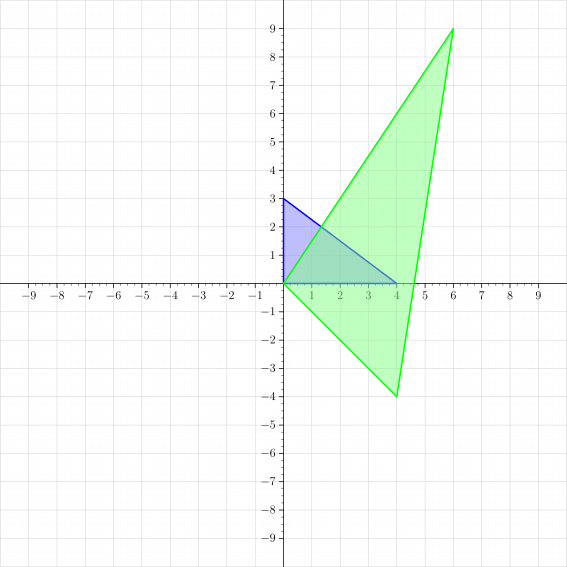

In [21]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pen g = opacity(.5)+lightgreen,
    b = opacity(.5)+lightblue;
pair P = (0,0),
     Q = (4,0),
     R = (0,3);
real A[][] = {{1,2},{-1,3}};
transform tr = TransformacioLineal(A);
Canonica(-10,10,-10,10);
filldraw(P--Q--R--cycle,b,1.5bp+blue);
filldraw(tr*P--tr*Q--tr*R--cycle,g,1.5bp+green);

## Exercici 9
Trobeu la matriu i la representació en la base canònica de la transformació lineal $T:V_3\longrightarrow V_3$ definida per
$$
  \left. \begin{aligned}
  T(1,1,1)&=(-1,1,-3)\\
  T(1,2,2)&=(0,1,-4)\\
  T(1,2,3)&=(1,4,-7)
  \end{aligned} \right\}\,.
$$

Si $A$ és la matriu en la base canònica de la transformació lineal $T$, haurà de complir
$$
  A\left(\begin{array}{rrr}
  1 & 1 & 1\\
  1 & 2 & 2\\
  1 & 2 & 3
  \end{array}\right)
  =\left(\begin{array}{rrr}
  -1 &  0 &  1 \\
   1 &  1 &  4 \\
  -3 & -4 & -7
  \end{array}\right)\,.
$$
Aleshores,
$$
  A = \left(\begin{array}{rrr}
  -1 &  0 &  1 \\
   1 &  1 &  4 \\
  -3 & -4 & -7
  \end{array}\right)
  \left(\begin{array}{rrr}
  1 & 1 & 1\\
  1 & 2 & 2\\
  1 & 2 & 3
  \end{array}\right)^{-1}\,.
$$

In [22]:
B = matrix([[1,1,1],[1,2,2],[1,2,3]])
show(B)

[1 1 1]
[1 2 2]
[1 2 3]

In [23]:
C = matrix([[-1,0,1],[1,1,4],[-3,-4,-7]])
show(C)

[-1  0  1]
[ 1  1  4]
[-3 -4 -7]

In [24]:
A = C * B.inverse()
show(A)

[-2  0  1]
[ 1 -3  3]
[-2  2 -3]

La matriu i la representació en la base canònica de $T$ són
$$
  A=\left(\begin{array}{rrr}
  -2 & 0 & 1 \\
   1 & -3 & 3 \\
  -2 & 2 & -3
  \end{array}\right)\qquad\text{i}\qquad 
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  =\left(\begin{array}{rrr}
  -2 & 0 & 1 \\
   1 & -3 & 3 \\
  -2 & 2 & -3
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)\,.
$$

## Exercici 10
Calculeu la matriu respecte de la base $\mathcal{B}'=\{(2,-1,3),(2,1,2),(1,-1,2)\}$ de la transformació lineal $T:V_3\longrightarrow V_3$ definida per
$$T(x,y,z)=(2x+3y-z,x-y+4z,x-3y+2z) \,. $$

La representació d'aquesta transformació lineal en la base canònica és
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  = \left(\begin{array}{rrr}
  2 &  3 & -1\\
  1 & -1 &  4\\
  1 & -3 &  2
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,.
$$
El que hem de fer es representar aquesta transformació com a
$$
  \left(\begin{array}{c} u'\\ v'\\ w' \end{array}\right)
  = A'
  \left(\begin{array}{c} x'\\ y'\\ z' \end{array}\right)\,.
$$
on $(x',y',z')$ i $(u',v',w')$ són components en la base $\mathcal{B}'$ d'un vector i el seu transformat.

Hem de fer servir la fórmula $A'=C^{-1}AC$. on $A$ és la matriu de la transformació lineal en la base canònica i $C$ és la matriu del canvi de base de la base $\mathcal{B}'$ a la base canònica.

In [25]:
A = matrix([[2,3,-1],[1,-1,4],[1,-3,2]])
C = matrix([[2,-1,3],[2,1,2],[1,-1,2]]).T
show(A)
show(C)

[ 2  3 -1]
[ 1 -1  4]
[ 1 -3  2]

[ 2  2  1]
[-1  1 -1]
[ 3  2  2]

In [26]:
A1 = C.inverse() * A * C
show(A1)

[-71  -7 -56]
[ 28   7  21]
[ 84   5  67]

Així doncs, la representació de la transformació lineal $T$ en la base $\mathcal{B}'$ és
$$
  \left(\begin{array}{c} u'\\ v'\\ w' \end{array}\right)
  = \left(\begin{array}{rrr}
  -71 & -7 & -56 \\
   28 & 7 & 21 \\
   84 & 5 & 67
\end{array}\right)
  \left(\begin{array}{c} x'\\ y'\\ z' \end{array}\right)\,.
$$

## Exercici 11
Trobeu la representació en la base canònica de la transformació lineal que consisteix en un escalat de factor $1$ en la direcció $(-3,3,1)$, un de factor $1$ en la direcció $(1,-3,-2)$ i un amb factor $3$ en la direcció $(1,-2,-1)$.

En aquestes condicions, la representació de la transformació lineal en la base $\mathcal{B}'=\{(-3,3,1),(1,-3,-2),(1,-2,-1)\}$ és
$$
  \left(\begin{array}{c} u'\\ v'\\ w' \end{array}\right)
  = \left(\begin{array}{rrr}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 3
  \end{array}\right)
  \left(\begin{array}{c} x'\\ y'\\ z' \end{array}\right)\,.
$$
Ara hem d'aplicar la fòrmula del canvi de base per a transformacions lineals, $A=CA'C^{-1}$, on

In [27]:
u1 = vector([-3,3,1])
u2 = vector([1,-3,-2])
u3 = vector([1,-2,-1])
C = matrix([u1,u2,u3]).T
A1 = matrix([[1,0,0],[0,1,0],[0,0,3]])
show(C)
show(A1)

[-3  1  1]
[ 3 -3 -2]
[ 1 -2 -1]

[1 0 0]
[0 1 0]
[0 0 3]

In [28]:
A = C * A1 * C.inverse()
show(A)

[ -5 -10  12]
[ 12  21 -24]
[  6  10 -11]

Per tant, la representació de la transformació lineal en la base canònica és
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  = \left(\begin{array}{rrr}
  -5 & -10 &  12 \\
  12 &  21 & -24 \\
   6 &  10 & -11
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,.
$$

## Exercici 12
Calculeu la matriu associada en la base $\mathcal{B}'=\{(1,2),(2,1)\}$
del gir vectorial d'angle $\dfrac{3\pi}{4}$.

La representació d'un gir d'angle $\alpha$ en la base canònica és
$$
  \left(\begin{array}{c} u\\ v \end{array}\right)
  = \left(\begin{array}{rr}
  \cos\alpha & -\sin\alpha \\
  \sin\alpha &  \cos\alpha
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)\,.
$$

En aquest cas $\alpha=\dfrac{3\pi}{4}$ i la matriu corresponent serà

In [29]:
alfa = 3*pi/4
A = matrix([[cos(alfa),-sin(alfa)],[sin(alfa),cos(alfa)]])
show(A)

[-1/2*sqrt(2) -1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)]

La resta és com l'exercici 10:

In [30]:
C = matrix([[1,2],[2,1]]).T
A1 = C.inverse() * A * C
show(A1)

[ 1/6*sqrt(2)  5/6*sqrt(2)]
[-5/6*sqrt(2) -7/6*sqrt(2)]

La representació del gir en la base $\mathcal{B}'$ és
$$ 
  \left(\begin{array}{c} u'\\ v' \end{array}\right) =
  \frac{\sqrt{2}}{6}\left(\begin{array}{rr}
   1 &  5 \\
  -5 & -7 \\
  \end{array}\right)
  \left(\begin{array}{c} x'\\ y' \end{array}\right)\,,\qquad\text{o bé,}\qquad
  \left(\begin{array}{c} u'\\ v' \end{array}\right) =
  \frac{1}{3\sqrt{2}}\left(\begin{array}{rr}
   1 &  5 \\
  -5 & -7 \\
  \end{array}\right)
  \left(\begin{array}{c} x'\\ y' \end{array}\right)\,.
$$

## Exercici 13
Sigui $T$ l'escalat de factors 4 en la direcció de les $x$ i 3 en la direcció de les $y$ i $G$ el gir de $120^\circ$.
1. Trobeu la representació en la base canònica de la transformació lineal que consisten en aplicar primer l'escalat i després el gir.
1. Representeu en què que es transforma el rectangle de vèrtexs $(-2,-1)$, $(2,-1)$, $(2,1)$ i $(-2,1)$. 

La representació en la base canònica de l'escalat i del gir són, repectivament,
$$
  \left(\begin{array}{c} u\\ v \end{array}\right)
  =\left(\begin{array}{rr}
   4 & 0 \\
   0 & 3 
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)\qquad\text{i}\qquad
  \left(\begin{array}{c} u\\ v \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{cc}
     -1     & -\sqrt{3} \\
   \sqrt{3} &    -1
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)\,.
$$
Aleshores, si apliquem primer l'escalat i després el gir, tindrem que
$$
  \left(\begin{array}{c} u\\ v \end{array}\right)=
  \frac{1}{2}\left(\begin{array}{cc}
     -1     & -\sqrt{3} \\
   \sqrt{3} &    -1
  \end{array}\right)
  \left(\begin{array}{rr}
   4 & 0 \\
   0 & 3 
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)
$$


In [31]:
A1 = matrix([[4,0],[0,3]])
alfa = 2*pi/3
A2 = matrix([[cos(alfa),-sin(alfa)],[sin(alfa),cos(alfa)]])
A = A2 * A1
show(A)

[          -2 -3/2*sqrt(3)]
[   2*sqrt(3)         -3/2]

La representació en la base canònica de la transformació resultant és
$$
  \left(\begin{array}{c} u\\ v \end{array}\right) 
  =\frac{1}{2}\left(\begin{array}{cc}
     -4     & -3\sqrt{3} \\
   4\sqrt{3} &    -3
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)\,.
$$

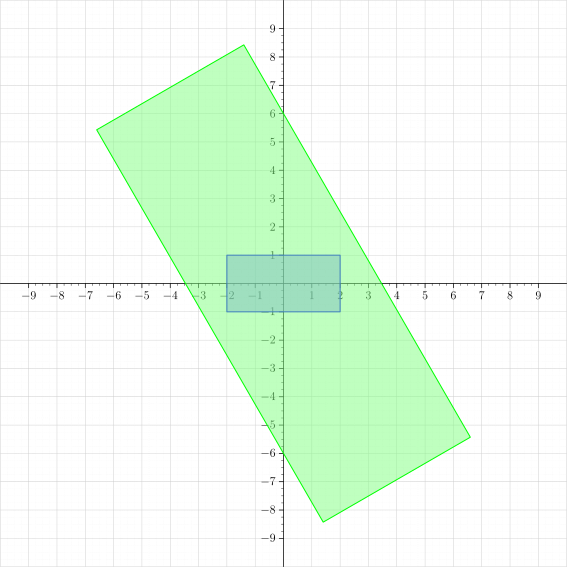

In [32]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pen g = opacity(.5)+lightgreen,
    b = opacity(.5)+lightblue;
pair P[] = {(-2,-1), (2,-1), (2,1), (-2,1)};
real A[][] = {{-2,-3*sqrt(3)/2},{2*sqrt(3),-3/2}};
transform tr = TransformacioLineal(A);
Canonica(-10,10,-10,10);
filldraw(P[0]--P[1]--P[2]--P[3]--cycle,b,1bp+blue);
filldraw(tr*P[0]--tr*P[1]--tr*P[2]--tr*P[3]--cycle,g,1bp+green);

## Exercici 14
Trobeu la representació en la base canònica de la rotació vectorial d'angles respectius d'Euler
$$\psi=\dfrac{3\pi}{2} \,, \qquad \theta=\dfrac{5\pi}{4} \qquad \text{i} \qquad \phi=\dfrac{\pi}{4} \,. $$

In [34]:
psi = 3*pi/2
theta = 5*pi/4
phi = pi/4

In [35]:
A = euler(psi,theta,phi)
show(A)

[        -1/2  1/2*sqrt(2)         -1/2]
[         1/2  1/2*sqrt(2)          1/2]
[ 1/2*sqrt(2)            0 -1/2*sqrt(2)]

La matriu en la base canònica i i la representació en la mateixa basede de la rotació són, respectivament
$$
  A = \frac{1}{2}\left(\begin{array}{ccc}
     -1    & \sqrt{2} &  -1 \\
     1     & \sqrt{2} &   1 \\
  \sqrt{2} &   0      & -\sqrt{2}
  \end{array}\right)\qquad\text{i}\qquad
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right) =
  \frac{1}{2}\left(\begin{array}{ccc}
     -1    & \sqrt{2} &  -1 \\
     1     & \sqrt{2} &   1 \\
  \sqrt{2} &   0      & -\sqrt{2}
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,.
$$

## Exercici 15
Trobeu la matriu en la base canònica de la rotació vectorial d'angle $\dfrac{\pi}{2}$ al voltant del vector $(1,0,1)$ 
1. directament;
1. fent servir quaternions.

En primer hem de determinar una base ortonormal positiva de manera que el primer sigui proporcional (amb la mateixa direcció i sentit) al vector $(1,0,1)$.

In [38]:
u1 = 1/sqrt(2)*vector([1,0,1])
show(u1)

(1/2*sqrt(2), 0, 1/2*sqrt(2))

El segon vector pot ser qualsevol vector perpendicular al primer:

In [39]:
u2 = vector([0,1,0])
show(u2)

(0, 1, 0)

El tercer ha de ser el producte vectorial del dos primers:

In [40]:
u3 = u1.cross_product(u2)
show(u3)

(-1/2*sqrt(2), 0, 1/2*sqrt(2))

La matriu de la rotació en la base $\mathcal{B}'=\{\vec u_1,\vec u_2,\vec u_3\}$ és
$$
  A' = \left(\begin{array}{rcc}
  1 &     0      &    0       \\
  0 & \cos\alpha & -\sin\alpha \\
  0 & \sin\alpha &  \cos\alpha
  \end{array}\right)\,.
$$
Només cal substituir $\alpha=\dfrac{\pi}{2}$ i aplicar la fórmula del canvi de base per a transformacions lineals:

In [41]:
alfa = pi/2
A1 = matrix([[1,0,0],[0,cos(alfa),-sin(alfa)],[0,sin(alfa),cos(alfa)]])
C = matrix([u1,u2,u3]).T
show(C)

[ 1/2*sqrt(2)            0 -1/2*sqrt(2)]
[           0            1            0]
[ 1/2*sqrt(2)            0  1/2*sqrt(2)]

In [42]:
A = C * A1 * C.inverse()
show(A)

[         1/2 -1/2*sqrt(2)          1/2]
[ 1/2*sqrt(2)            0 -1/2*sqrt(2)]
[         1/2  1/2*sqrt(2)          1/2]

La matriu i la representació de la rotació vectorial d'angle $\frac{\pi}{2}$ al voltant del vector $(1,0,1)$ en la base canónica són
$$
  A=\frac{1}{2}\left(\begin{array}{rrr}
   1 & -\sqrt{2} & 1 \\
   \sqrt{2} & 0 & -\sqrt{2} \\
   1 & \sqrt{2} & 1
  \end{array}\right)\qquad\text{i}\qquad 
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{rrr}
  1 & -\sqrt{2} & 1 \\
   \sqrt{2} & 0 & -\sqrt{2} \\
   1 & \sqrt{2} & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)\,.
$$

El quaternió que determina aquesta rotació és
$$
  q = \cos\frac{\alpha}{2} + \sin\frac{\alpha}{2}\vec u_1\,.
$$

In [43]:
a  = cos(alfa/2)
b,c,d = sin(alfa/2)*u1

In [45]:
A = quaternio_a_rotacio(a,b,c,d)
show(A)

[         1/2 -1/2*sqrt(2)          1/2]
[ 1/2*sqrt(2)            0 -1/2*sqrt(2)]
[         1/2  1/2*sqrt(2)          1/2]

Evidentment, obtenim el mateix resultat que abans.

## Exercici 16
Trobeu l'expressió en la base canònica de la transformació lineal de $V_3$ que consisteix en aplicar successivament una rotació vectorial de $60^\circ$ al voltant de l'eix de les $x$, una rotació vectorial de $30^\circ$ al voltant de l'eix de les $y$ i una rotació vectorial de $120^\circ$ al voltant de l'eix de les $z$. Trobeu també l'eix de la combinació de les tres rotacions.

Recordem que una rotació d'angle $\alpha$ al voltant de l'eix de les $x$ ve donada per
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  =\left(\begin{array}{ccc}
     1      &     0       &    0 \\
     0      &  \cos\alpha & -\sin\alpha \\
     0      &  \sin\alpha &   \cos\alpha
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,,
$$
que la rotació d'angle $\alpha$ al voltant de l'eix de les $y$ ve donada per
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  =\left(\begin{array}{ccc}
   \cos\alpha  &   0   & \sin\alpha \\
      0        &   1   &    0 \\
   -\sin\alpha &   0   & \cos\alpha
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,,
$$
i que la rotació d'angle $\alpha$ al voltant de l'eix de les $z$ ve donada per
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  =\left(\begin{array}{ccc}
   \cos\alpha  & -\sin\alpha  &    0 \\
   \sin\alpha  &  \cos\alpha  &    0 \\
      0        &      0       &    1
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,.
$$

Escrivim primer els angles expressats en radiants:

In [46]:
g = pi/180
alfa = 60*g
beta = 30*g
gamma = 120*g

Aleshores, la matriu de la rotació de $60^\circ$ al voltant de l'eix de les $x$ és

In [47]:
A = matrix([[1,0,0],[0,cos(alfa),-sin(alfa)],[0,sin(alfa),cos(alfa)]])
show(A)

[           1            0            0]
[           0          1/2 -1/2*sqrt(3)]
[           0  1/2*sqrt(3)          1/2]

La matriu de la rotació de $30^\circ$ al voltant de l'eix de les $y$ és

In [48]:
B = matrix([[cos(beta),0,sin(beta)],[0,1,0],[-sin(beta),0,cos(beta)]])
show(B)

[1/2*sqrt(3)           0         1/2]
[          0           1           0]
[       -1/2           0 1/2*sqrt(3)]

De manera semblant, La matriu de la rotació de $120^\circ$ al voltant de l'eix de les $z$

In [49]:
C = matrix([[cos(gamma),-sin(gamma),0],[sin(gamma),cos(gamma),0],[0,0,1]])
show(C)

[        -1/2 -1/2*sqrt(3)            0]
[ 1/2*sqrt(3)         -1/2            0]
[           0            0            1]

Tenint en compte l'ordre en que hem d'aplicar les rotacions, la matriu resultant serà

In [50]:
R = C * B * A
show(R)

[-1/4*sqrt(3) -3/8*sqrt(3)          5/8]
[         3/4          1/8  3/8*sqrt(3)]
[        -1/2          3/4  1/4*sqrt(3)]

Per tant, la transformació lineal ve donada per
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  =\frac{1}{8}\left(\begin{array}{ccc}
   -2\sqrt{3} & -3\sqrt{3} &     5  \\
        6     &     1      & 3\sqrt{3} \\
       -4     &     6      & 2\sqrt{3}
   \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,,
$$

Per trobar l'eix de rotació, hem de resoldre el sistema d'equacions
$$
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)
  =\frac{1}{8}\left(\begin{array}{ccc}
   -2\sqrt{3} & -3\sqrt{3} &     5  \\
        6     &     1      & 3\sqrt{3} \\
       -4     &     6      & 2\sqrt{3}
   \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,,
$$

In [51]:
x, y, z = var('x y z')
X = vector([x,y,z])
TX = R * X
show(solve([TX[0] == x,TX[1] == y,TX[2] == z],[x,y,z]))

[[x == r2, y == 3*sqrt(3)*r2 + 6*r2, z == 4*sqrt(3)*r2 + 7*r2]]

L'eix de rotació ve donat pel vector $\vec w=(1,6+3\sqrt{3},7+4\sqrt{3})$. Per comprovar que és correcte, fem el càlcul següent:

In [52]:
w = vector([1,6+3*sqrt(3),7+4*sqrt(3)])
simplificar_radicals(R*w) == w

True

## Exercici 17
Donada la rotació representada en la base canònica per
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  =\frac{1}{3}\left(\begin{array}{ccc}
         1     & -1+\sqrt{3} & -1-\sqrt{3}\\ 
   -1-\sqrt{3} &      1      & 1-\sqrt{3}\\ 
   -1+\sqrt{3} &  1+\sqrt{3} &     1
   \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,,
$$
trobeu l'eix i l'angle de rotació i el quaternió que la defineix.

Per trobar l'eix de rotació hem de resoldre el sistema d'equacions
$$
  \left(\begin{array}{c} x\\ y\\ z\end{array}\right)
  =\frac{1}{3}\left(\begin{array}{ccc}
         1     & -1+\sqrt{3} & -1-\sqrt{3}\\ 
   -1-\sqrt{3} &      1      & 1-\sqrt{3}\\ 
   -1+\sqrt{3} &  1+\sqrt{3} &     1
   \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,.
$$

In [53]:
x, y, z = var('x y z')
X = vector([x,y,z])
A = 1/3*matrix([[1,-1+sqrt(3),-1-sqrt(3)],[-1-sqrt(3),1,1-sqrt(3)],[-1+sqrt(3),1+sqrt(3),1]])
show(A)

[               1/3  1/3*sqrt(3) - 1/3 -1/3*sqrt(3) - 1/3]
[-1/3*sqrt(3) - 1/3                1/3 -1/3*sqrt(3) + 1/3]
[ 1/3*sqrt(3) - 1/3  1/3*sqrt(3) + 1/3                1/3]

In [54]:
TX = A * X
show(solve([TX[0] == x,TX[1] == y,TX[2] == z],[x,y,z]))

[[x == -r3, y == r3, z == r3]]

L'eix de rotació ve donat pel vector $\vec w = (-1,1,1)$. Per trobar l'angle de rotació, hem de començar aplicant la fórmula
$$
  \cos\alpha=\frac{-1+\text{traça}(A)}{2}
$$

In [55]:
w = vector([-1,1,1])
a = acos((-1+A.trace())/2)
show(a)

1/2*pi

Amb això, només podem afirmar que l'angle de rotació és de $90^\circ$ o de $270^\circ$. Per determinar quin dels dos és, escollim un vector qualsevol i calculem

In [56]:
u = vector([1,0,0])
v = A * u
M = matrix([w,u,v]).T
show(M.det())

-2/3*sqrt(3)

Com que el determinant és negatiu, l'angle de rotació és $\alpha=270^\circ$.

El quaternió que detetrmina la rotació és
$$
   q = \cos(135^\circ)+\sin(135^\circ)\frac{1}{\sqrt{3}}(-1,1,1)
$$

La part escalar del quaternió és

In [57]:
a = cos(135*pi/180)
show(a)

-1/2*sqrt(2)

La part vectorial del quaternió és

In [58]:
u = simplificar_radicals(sin(135*pi/180)*1/sqrt(3)*w)
show(u)

(-1/6*sqrt(6), 1/6*sqrt(6), 1/6*sqrt(6))

és a dir, la part vectorial és
$$
  \vec u=\frac{1}{\sqrt{6}}\big(-\vec\imath + \vec\jmath + \vec k\big)\,.
$$

Per tant, el quaternió és
$$
  q = -\frac{1}{\sqrt{2}}+ \frac{1}{\sqrt{6}}\left(-i+j+k\right)=
  \frac{1}{\sqrt{6}}\left(-\sqrt{3}-i+j+k\right)\,.
$$
Recordem que el seu oposat $q = \dfrac{1}{\sqrt{6}}\left(\sqrt{3}+i-j-k\right)$ també és correcte ja que defineix la mateixa rotació.

## Exercici 18
Determineu si la transformació lineal $T:V_2\longrightarrow V_2$ que en la base $\mathcal{B}'=\{(1,2),(1,1)\}$ ve representada per
$$
  \left(\begin{array}{c} u\\ v\end{array}\right) =
  \frac{1}{\sqrt2} \,
  \left(\begin{array}{rr}
  4 & 2\\
 -5 & 2
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)
$$
és un gir vectorial i, en cas afirmatiu, calculeu l'angle de gir.

En primer lloc, hem de trobar la matriu de la transformació lineal en la base canònica aplicant la fórmula
$$
  A = CA'C^{-1}\,.
$$

In [59]:
A1 = 1/sqrt(2)*matrix([[4,2],[-5,-2]])
C = matrix([[1,2],[1,1]]).T
A = C * A1 * C.inverse()
show(A)

[ 1/2*sqrt(2) -1/2*sqrt(2)]
[ 1/2*sqrt(2)  1/2*sqrt(2)]

Una transformació lineal de $V_2$ és un gir si compleix que $A^tA=I$ i $\det(A)=1$. Comprovem-ho:

In [60]:
show(A.T * A)

[1 0]
[0 1]

In [61]:
show(A.det())

1

Efectivament, $T$ és un gir. La millor manera de determinar l'angle de gir és

In [62]:
show(atan2(A[1,0],A[0,0]))

1/4*pi

Així doncs, és tracta d'un gir d'angle $\dfrac{\pi}{4}$.

## Exercici 19
Analitzeu si la transformació lineal $T$ de $V_3$ representada per
$$
  \left(\begin{array}{c} u\\ v\\ w \end{array}\right)
  =\frac{1}{2}
  \left(\begin{array}{ccc}
      1    &    1      & -\sqrt{2} \\
      1    &    1      &  \sqrt{2} \\
  \sqrt{2} & -\sqrt{2} &     0
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)
$$
és una rotació vectorial i, en cas afirmatiu, calculeu els angles d'Euler i el vector i l'angle de gir
1. directament;
2. fent servir quaternions.

La matriu en la base canònica de $T$ és

In [63]:
A = 1/2*matrix([[1,1,-sqrt(2)],[1,1,sqrt(2)],[sqrt(2),-sqrt(2),0]])
show(A)

[         1/2          1/2 -1/2*sqrt(2)]
[         1/2          1/2  1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)            0]

Per saber si és una rotació vectorial hem de comprovar si compleix $A^tA=I$ i $\det(A)=1$.

In [64]:
show(A.T * A)

[1 0 0]
[0 1 0]
[0 0 1]

In [65]:
show(A.det())

1

Efectivament, és una rotació vectorial. Per calcular els angles d'Euler, hem definit una funció.

In [71]:
psi, theta, phi = angles_euler_rotacio(A,radiants=True)
show(psi)
show(theta)
show(phi)

3/4*pi

1/2*pi

5/4*pi

Els angles d'Euler són $\psi=\dfrac{3\pi}{4}$, $\theta=\dfrac{\pi}{2}$ i $\phi=\dfrac{5\pi}{4}$.

Comprovacio:

In [72]:
show(euler(psi,theta,phi))

[         1/2          1/2 -1/2*sqrt(2)]
[         1/2          1/2  1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)            0]

Per trobar el vector de gir hem de resoldre el sistema d'equacions
$$
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)
  =\frac{1}{2}
  \left(\begin{array}{ccc}
      1    &    1      & -\sqrt{2} \\
      1    &    1      &  \sqrt{2} \\
  \sqrt{2} & -\sqrt{2} &     0
  \end{array}\right)
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)\,.
$$

In [73]:
x, y, z = var('x y z')
X = vector([x,y,z])
TX = A * X
sol = solve([TX[0] == x,TX[1] == y,TX[2] == z],[x,y,z])
show(sol)

[[x == r4, y == r4, z == 0]]

El vector de gir és $\vec w=(1,1,0)$.

Per determinar l'angle de gir, hem de fer el següent

In [74]:
a = acos((-1+A.trace())/2)
show(a)

1/2*pi

Amb això sabem que l'angle de gir pot ser $\alpha=\dfrac{\pi}{2}$ o $\alpha=\dfrac{3\pi}{2}$. Per saber quin dels dos és:

In [75]:
u = vector([1,0,0])
w = vector([1,1,0])
Tu = A * u
show(matrix([w,u,Tu]).T.det())

-1/2*sqrt(2)

Com que és negatiu, l'angle de gir és $\alpha=\dfrac{3\pi}{2}$.

Per a obtenir el vector i l'angle de gir mitjançant quaternions, hem de determinar el quaternió unitari
$$
  q = a + bi + cj + dk
$$
que determina la rotació.

In [76]:
a, b, c, d = var('a b c d')
M = quaternio_a_rotacio(a,b,c,d)
show(M)

[2*a^2 + 2*b^2 - 1     2*b*c - 2*a*d     2*a*c + 2*b*d]
[    2*b*c + 2*a*d 2*a^2 + 2*c^2 - 1    -2*a*b + 2*c*d]
[   -2*a*c + 2*b*d     2*a*b + 2*c*d 2*a^2 + 2*d^2 - 1]

Ara hem d'igualar aquesta matriu a la matriu $A$ de l'enunciat i resoldre el corresponent sistema d'equacions.

**Important**: fixeu-vos com es resol aquesta igualtat matricial.

In [77]:
show(solve([M[i,j] == A[i,j] for i in range(3) for j in range(3)],[a,b,c,d]))

[[a == -1/2*sqrt(2), b == (1/2), c == (1/2), d == 0],
 [a == 1/2*sqrt(2), b == (-1/2), c == (-1/2), d == 0]]

Podem escollir qualsevol de les dues solucions. Si prenem la primera, tindrem que
$$
  a=-\frac{\sqrt{2}}{2}\,,\qquad b=\frac{1}{2}\,,\qquad c=\frac{1}{2}\,,\quad\text{i}\quad d=0\,, 
$$
és a dir, el quaternió és
$$
  q=-\frac{\sqrt{2}}{2} + \frac{i}{2} + \frac{j}{2}=-\frac{\sqrt{2}}{2} +\frac{\sqrt{2}}{2}\cdot\frac{1}{\sqrt{2}}(i+j)\,.
$$
Per tant, el vector de gir és $\vec w=(1,1,0)$ i $\cos\dfrac{\alpha}{2}=-\dfrac{\sqrt{2}}{2}$ i $\sin\dfrac{\alpha}{2}=\dfrac{\sqrt{2}}{2}$.

In [78]:
c = -sqrt(2)/2
s = sqrt(2)/2
show(2 * atan2(c,s))

-1/2*pi

El vector de gir és $\vec w=(1,1,0)$ i l'angle de gir $\alpha=-\dfrac{\pi}{2}$ (que és equivalent a $\dfrac{3\pi}{2}$).

## Exercici 20
Trobeu la imatge del punt $(0,1,-2)$ i les antiimatges del punt $(3,1,-1)$
en la transformació afí $T$ de $P_3$ tal que
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{r} 4 \\ 1 \\ -2 \end{array}\right)
  + \left(\begin{array}{rrr}
   -1 &  1 &  0\\
   -4 &  0 & -1\\
    1 & -1 &  0
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)\,.
$$

Per calcular les imatges hem de substituir la $x$, la $y$ i la $z$ per les coordenades del punt del que volem calcular la imatge

In [79]:
B = vector([4,1,-2])
A = matrix([[-1,1,0],[-4,0,-1],[1,-1,0]])
p = vector([0,1,-2])
show(B + A*p)

(5, 3, -3)

La imatge del punt $(0,1,-2)$ és el punt $(5,3,-3)$, és a dir, $T(0,1,-2)=(5,3,-3)$.

Per trobar antiimatges, hem de resoldre un sistema d'equacions:

In [81]:
x, y, z = var('x y z')
X = vector([x,y,z])
q = vector([3,1,-1])
TX = B + A*X
show(TX)

(-x + y + 4, -4*x - z + 1, x - y - 2)

In [82]:
show(solve([TX[i] == q[i] for i in range(3)],[x,y,z]))

[[x == r5, y == r5 - 1, z == -4*r5]]

Tots els punts de la forma $(t,t-1,-4t)$ són antiimatges de $(3,1,-1)$, és a dir, 
$$
  T^{-1}(3,1,-1)=\{(t,t-1,-4t)\quad\text{amb}\quad t\in\mathbb{R}\}\,.
$$

## Exercici 21
Donada la transformació afí 
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{r} 2 \\ 3 \end{array}\right)
  +\frac{1}{9}\left(\begin{array}{rr}
   1 & 4\\
   8 & 5
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \end{array}\right)\,,
$$
representeu gràficament la figura que s'ha transformat en la circumferència de centre $(3,-1)$ i radi 2.

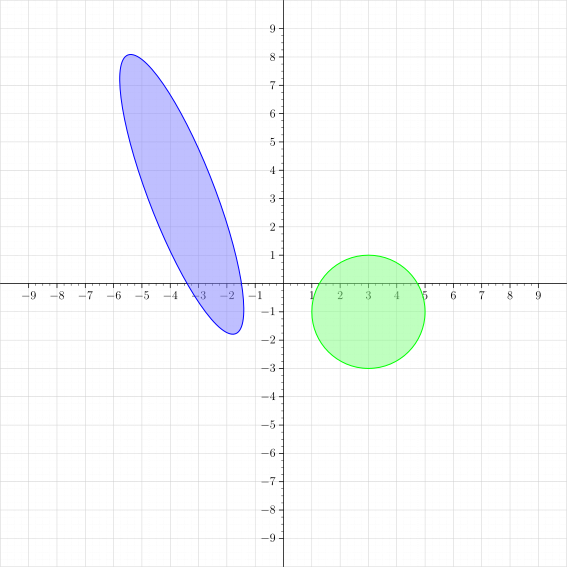

In [83]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pen g = opacity(.5)+lightgreen,
    b = opacity(.5)+lightblue;

path c = circle((3,-1),2);
real B[] = {2,3};
real A[][] = {{1/9,4/9},{8/5,5/9}};
transform tr = TransformacioAfi(B,A);

Canonica(-10,10,-10,10);
filldraw(c,g,1bp+green);
filldraw(inverse(tr)*c,b,1bp+blue);

## Exercici 22
Donada la transformació afí de $P_2$
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{r} 3 \\ -1 \end{array}\right)
  +\frac{1}{2}\left(\begin{array}{rr}
   3 & 1\\
   1 & 4
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \end{array}\right)\,,
$$
representeu en què es transforma el rectangle de vèrtexs $(1,0)$, $(4,3)$, $(3,4)$ i $(0,1)$ i trobeu els punts fixos d'aquesta transformació. Un punt fix d'una transformació afí és el que compleix $T(x,y)=(x,y)$.

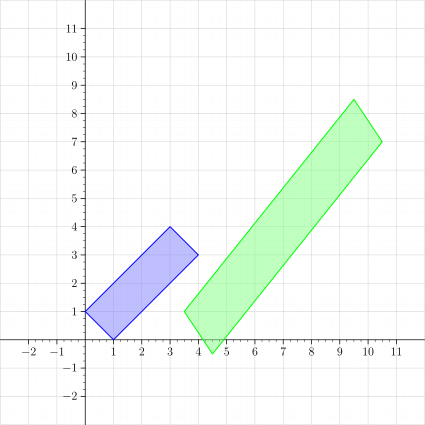

In [84]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pen g = opacity(.5)+lightgreen,
    b = opacity(.5)+lightblue;

path P = (1,0)--(4,3)--(3,4)--(0,1)--cycle;

real B[] = {3,-1};
real A[][] = {{3/2,1/2},{1/2,2}};
transform tr = TransformacioAfi(B,A);

Canonica(-3,12,-3,12);
filldraw(P,b,1bp+blue);
filldraw(tr*P,g,1bp+green);

Per trabar els punts fixos, hem de resoldre el sistema d'equacions
$$
  \left(\begin{array}{c} x \\ y \end{array}\right)
  =\left(\begin{array}{r} 3 \\ -1 \end{array}\right)
  +\frac{1}{2}\left(\begin{array}{rr}
   3 & 1\\
   1 & 4
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \end{array}\right)\,.
$$

In [85]:
x, y = var('x y')
X = vector([x,y])
A = 1/2*matrix([[3,1],[1,4]])
B = vector([3,-1])
TX = B + A * X 
show(TX)

(3/2*x + 1/2*y + 3, 1/2*x + 2*y - 1)

In [86]:
show(solve([X[i] == TX[i] for i in range(2)],[x,y]))

[[x == -14, y == 8]]

Aquesta transformació afí té un únic punt fix, el $(-14,8)$.

## Exercici 23
Sabent que la transformació afí $T$ del pla transforma els punts
$p=\left(-1,1\right)$, $q=\left(2,-2\right)$ i $r=\left(-2,-2\right)$ ens els punts $T(p)=\left(4,1\right)$, $T(q)=\left(-14,7\right)$ 
i $T(r)=\left(-6,11\right)$, trobeu l'expressió de $T$ en la referència canònica.

La transformació afí serà de la forma
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  = B + A\left(\begin{array}{c} x \\ y \end{array}\right)
$$
Aleshores tindrem que
$$
  \left(\begin{array}{r} 4 \\ 1 \end{array}\right)
  = B + A\left(\begin{array}{r} -1 \\ 1 \end{array}\right)\,,\qquad
  \left(\begin{array}{r} -14 \\ 7 \end{array}\right)
  = B + A\left(\begin{array}{r} 2 \\ -2 \end{array}\right)\,,\qquad\text{i}\qquad
  \left(\begin{array}{r} -6 \\ 11 \end{array}\right)
  = B + A\left(\begin{array}{r} -2 \\ -2 \end{array}\right)\,,\qquad
$$

Si restem la segona igualtat menys la primera, obtenim que
$$
  \left(\begin{array}{r} -18 \\ 6 \end{array}\right)
  =A\left(\begin{array}{r} 3 \\ -3 \end{array}\right)\,.
$$

De manera semblant, si restem la tercera menys la primera, tenim que
$$
  \left(\begin{array}{r} -10 \\ 10 \end{array}\right)
  =A\left(\begin{array}{r} -1 \\ -3 \end{array}\right)\,.
$$

Per tant, la matriu $A$ ha de complir que
$$
  A\left(\begin{array}{rr} 
   3 & -1 \\
  -3 & -3 
  \end{array}\right)
  =\left(\begin{array}{rr} 
   -18 & -10 \\
     6 &  10 
  \end{array}\right)\,.
$$

D'aquí, podrem calcular la matriu $A$:
$$
  A=\left(\begin{array}{rr} 
   -18 & -10 \\
     6 &  10 
  \end{array}\right)
  \left(\begin{array}{rr} 
   3 & -1 \\
  -1 & -3 
  \end{array}\right)^{-1}\,.
$$

A continuació fem els càlculs

In [87]:
p = vector([-1,1])
q = vector([2,-2])
r = vector([-2,-2])
Tp = vector([4,1])
Tq = vector([-14,7])
Tr = vector([-6,11])

In [88]:
C = matrix([q-p,r-p]).T
show(C)

[ 3 -1]
[-3 -3]

In [89]:
D = matrix([Tq-Tp,Tr-Tp]).T
show(D)

[-18 -10]
[  6  10]

Per tant, 

In [90]:
A = D * C.inverse()
show(A)

[-2  4]
[-1 -3]

Finalment, calculem la $B$ a partir de la iguatat
$$
  \left(\begin{array}{r} 4 \\ 1 \end{array}\right)
  = B + A\left(\begin{array}{r} -1 \\ 1 \end{array}\right)\,.
$$

In [91]:
B = Tp - A * p
show(B)

(-2, 3)

La representació de la transformació afí $T$ en la referència canònica és
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  = \left(\begin{array}{r} -2 \\ 3 \end{array}\right)
  + \left(\begin{array}{rr}
   -2 & 4 \\
   -1 & -3
   \end{array}\right)
   \left(\begin{array}{c} x \\ y \end{array}\right)\,.
$$

## Exercici 24
Calculeu la representació en la referència $\mathcal{R}'=\big\{(-1,2); \, (2,1),(3,2)\big\}$ 
de la transformació afí $T$ de $P_2$ representada en la referència canònica per
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{r} 1 \\ 1 \end{array}\right)
  +\left(\begin{array}{rr}
  2 & -1\\
  1 & -1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \end{array}\right)\,.
$$

La fórmula del canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica és
$$
  \left(\begin{array}{c} x \\ y \end{array}\right)
  =\left(\begin{array}{r} -1 \\ 2 \end{array}\right)
  +\left(\begin{array}{rr}
  2 & 3\\
  1 & 2
  \end{array}\right)
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\qquad\text{i}\qquad
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{r} -1 \\ 2 \end{array}\right)
  +\left(\begin{array}{rr}
  2 & 3\\
  1 & 2
  \end{array}\right)
  \left(\begin{array}{c} u' \\ v' \end{array}\right)
$$

Hem de combinar aquestes igualtats per a obtenir $(u',v')$ en funció de $(x',y')$. Si representem
$$
  U=\left(\begin{array}{c} u \\ v \end{array}\right)\,,\qquad
  X=\left(\begin{array}{c} x \\ y \end{array}\right)\,,\qquad
  U'=\left(\begin{array}{c} u' \\ v' \end{array}\right)\qquad\text{i}\qquad
  X'=\left(\begin{array}{c} x' \\ y' \end{array}\right)\,,
$$
tindrem que
$$
   U = P+AX\,,\qquad X=O+CX'\qquad U=O+CU'\,.
$$

Aleshores,
$$
  \begin{aligned}
   U' &= C^{-1}\big(U-O\big)=-C^{-1}O+C^{-1}U\\
      &= -C^{-1}O+C^{-1}\big(P+AX\big)=-C^{-1}O+C^{-1}P+C^{-1}AX\\
      &= C^{-1}\big(P - O\big)+C^{-1}A\big(O+CX'\big)\\
      &= C^{-1}\big(P - O + AO\big) + C^{-1}ACX'
  \end{aligned}
$$

In [100]:
O = vector([-1,2])
C = matrix([[2,1],[3,2]]).T
P = vector([1,1])
A = matrix([[2,-1],[1,-1]])

In [101]:
B1 = C.inverse()*(P-O+A*O)
show(B1)

(8, -6)

In [95]:
A1 = C.inverse() * A * C
show(A1)

[ 3  5]
[-1 -2]

La representació de la transformació afí en la referència $\mathcal{R}'$ és
$$
  \left(\begin{array}{c} u' \\ v' \end{array}\right)
  =\left(\begin{array}{r} 8 \\ -6 \end{array}\right)
  +\left(\begin{array}{rr}
   3 &  5\\
  -1 & -2
  \end{array}\right)
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,.
$$

## Exercici 25
Calculeu la representació en la referència $\mathcal{R}'=\big\{(1,2);\,(1,2),(2,1)\big\}$
del gir afí d'angle $\dfrac{3\pi}{4}$ al voltant del punt $(1,-1)$.

La matriu del gir vectorial d'angle $\dfrac{3\pi}{4}$ és

In [105]:
alfa = 3*pi/4
A = matrix([[cos(alfa),-sin(alfa)],[sin(alfa),cos(alfa)]])
show(A)

[-1/2*sqrt(2) -1/2*sqrt(2)]
[ 1/2*sqrt(2) -1/2*sqrt(2)]

La representació en la referència canònica del gir afí d'angle $\dfrac{3\pi}{4}$ al voltant del punt $(1,-1)$ és
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{r} 1 \\ -1 \end{array}\right)
  +\frac{1}{\sqrt{2}}\left(\begin{array}{rr}
  -1 & -1\\
   1 & -1
  \end{array}\right)
  \left(\begin{array}{c} x - 1\\ y + 1 \end{array}\right)\,.
$$

In [110]:
F = vector([1,-1])
P = F - A*F
show(B)

(1, -sqrt(2) - 1)

és a dir,
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{c} 1 \\ -1 - \sqrt{2} \end{array}\right)
  +\frac{1}{\sqrt{2}}\left(\begin{array}{rr}
  -1 & -1\\
   1 & -1
  \end{array}\right)
  \left(\begin{array}{c} x\\ y \end{array}\right)\,.
$$

Per calcular la representació en la referència $\mathcal{R}'=\{(1,2);\,(1,2),(2,1)\}$, hem de procedir com a l'exercici anterior:

In [111]:
O = vector([1,2])
C = matrix([[1,2],[2,1]]).T

In [112]:
B1 = C.inverse()*(P-O+A*O)
show(B1)

(-1/2*sqrt(2) - 2, -1/2*sqrt(2) + 1)

In [113]:
A1 = C.inverse() * A * C
show(A1)

[ 1/6*sqrt(2)  5/6*sqrt(2)]
[-5/6*sqrt(2) -7/6*sqrt(2)]

Per tant, la representació en la referència $\mathcal{R}'$ és
$$
  \left(\begin{array}{c} u' \\ v' \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} -4-\sqrt{2} \\ 2 - \sqrt{2} \end{array}\right)
  +\frac{1}{3\sqrt{2}}\left(\begin{array}{rr}
   1 &  5\\
  -5 & -7
  \end{array}\right)
  \left(\begin{array}{c} x'\\ y' \end{array}\right)\,.
$$

## Exercici 26
Siguin $G_1$ el gir de $120^\circ$ al voltant del punt $(2,3)$ i $G_2$ el gir de $-30^\circ$ al voltant del punt $(1,-3)$.
1. Trobeu la representació en la referència canònica de la transformació afí que consisteix en aplicar primer $G_2$ i després $G_1$.
1. Representeu en què es transforma el triangle de vèrtexs $(5,1)$, $(3,8)$ i $(-2,-1)$.
1. Trobeu un punt fix de la transformació afí.

Recordem que la representació en la referència canònica d'un gir d'angle $\alpha$ al voltant del punt $(x_0,y_0)$ és
$$
  \left(\begin{array}{c} u \\ v  \end{array}\right)
  = \left(\begin{array}{c} x_0 \\ y_0  \end{array}\right)
  + \left(\begin{array}{rr}
   \cos\alpha & -\sin\alpha \\
   \sin\alpha & \cos\alpha
  \end{array}\right)
  \left(\begin{array}{c} x-x_0 \\ y-y_0\end{array}\right)=
  \left(\begin{array}{c} x_0 \\ y_0  \end{array}\right)
  -\left(\begin{array}{rr}
   \cos\alpha & -\sin\alpha \\
   \sin\alpha & \cos\alpha
  \end{array}\right)
  \left(\begin{array}{c} x_0 \\ y_0\end{array}\right)
  + \left(\begin{array}{rr}
   \cos\alpha & -\sin\alpha \\
   \sin\alpha & \cos\alpha
  \end{array}\right)
  \left(\begin{array}{c} x \\ y\end{array}\right)
$$

En el cas de $G_1$, tenim que

In [114]:
alfa = 120*pi/180
A = matrix([[cos(alfa),-sin(alfa)],[sin(alfa),cos(alfa)]])
F1 = vector([2,3])
show(A)

[        -1/2 -1/2*sqrt(3)]
[ 1/2*sqrt(3)         -1/2]

In [115]:
P = F1-A*F1
show(P)

(3/2*sqrt(3) + 3, -sqrt(3) + 9/2)

La representació de $G_1$ en la referència canònica és
$$
  \left(\begin{array}{c} u \\ v  \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} 6+3\sqrt{3} \\ 9-2\sqrt{3} \end{array}\right)
  + \frac{1}{2}\left(\begin{array}{rr}
     -1     & -\sqrt{3} \\
   \sqrt{3} &    -1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y\end{array}\right)\,.
$$

Per a $G_2$ tenim que

In [116]:
beta = -30*pi/180
B = matrix([[cos(beta),-sin(beta)],[sin(beta),cos(beta)]])
F2 = vector([1,-3])
show(B)

[1/2*sqrt(3)         1/2]
[       -1/2 1/2*sqrt(3)]

In [117]:
Q = F2-B*F2
show(Q)

(-1/2*sqrt(3) + 5/2, 3/2*sqrt(3) - 5/2)

La representació de $G_2$ en la referència canònica és
$$
  \left(\begin{array}{c} u \\ v  \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} 5-\sqrt{3} \\ -5+3\sqrt{3} \end{array}\right)
  + \frac{1}{2}\left(\begin{array}{rr}
   \sqrt{3} &    1 \\
      -1    & \sqrt{3}
  \end{array}\right)
  \left(\begin{array}{c} x \\ y\end{array}\right)
$$

Aleshores, si primer apliquem $G_2$ i després $G_1$, tindrem la transformació afí
$$
  \left(\begin{array}{c} u \\ v  \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} 6+3\sqrt{3} \\ 9-2\sqrt{3} \end{array}\right)
     + \frac{1}{2}\left(\begin{array}{rr}
       -1     & -\sqrt{3} \\
     \sqrt{3} &    -1
    \end{array}\right)
  \left[
    \frac{1}{2}\left(\begin{array}{c} 5-\sqrt{3} \\ -5+3\sqrt{3} \end{array}\right)
    + \frac{1}{2}\left(\begin{array}{rr}
     \sqrt{3} &    1 \\
      -1    & \sqrt{3}
    \end{array}\right)
    \left(\begin{array}{c} x \\ y  \end{array}\right)
  \right]\,.
$$

In [118]:
show(A*B)

[ 0 -1]
[ 1  0]

In [119]:
R = simplificar_radicals(P+A*Q)
show(R)

(3*sqrt(3) - 1/2, -1/2*sqrt(3) + 5)

Així doncs, la representació en la referència canònica és
$$
  \left(\begin{array}{c} u \\ v  \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} -1+6\sqrt{3} \\ 10-\sqrt{3} \end{array}\right)
  +\left(\begin{array}{rr}
     0 & -1 \\
     1 &  0
  \end{array}\right)
  \left(\begin{array}{c} x \\ y\end{array}\right)\,.
$$

2. Per fer el gràfic hem de calcular els transformats de cada vèrtex del triangle:

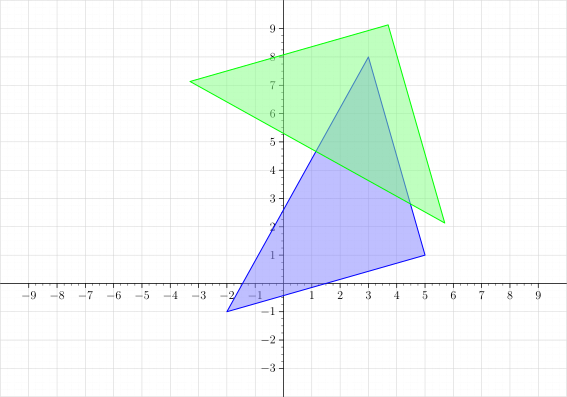

In [120]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

pen g = opacity(.5)+lightgreen,
    b = opacity(.5)+lightblue;
transform t1 = rotate(120,(2,3)),
          t2 = rotate(-30,(1,-3)),
          tr = t1*t2;
path P = (5,1)--(3,8)--(-2,-1)--cycle;
Canonica(-10,10,-4,10);
filldraw(P,b,1bp+blue);
filldraw(tr*P,g,1bp+green);

3. Per trobar un punt fix de la transformació afí, hem de resoldre els sistema d'equacions
$$
  \left(\begin{array}{c} x \\ y  \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} -1+6\sqrt{3} \\ 10-\sqrt{3} \end{array}\right)
  +\left(\begin{array}{rr}
     0 & -1 \\
     1 &  0
  \end{array}\right)
  \left(\begin{array}{c} x \\ y\end{array}\right)\,.
$$

In [121]:
x, y = var('x y')
X = vector([x,y])
TX = R+A*B*X
sol = solve([X[i] == TX[i] for i in range(2)],[x,y])
show(sol)

[[x == 7/4*sqrt(3) - 11/4, y == 5/4*sqrt(3) + 9/4]]

El punt de coordenades
$$
  \frac{1}{4}\left(-11+7\sqrt{3},9+5\sqrt{3}\right)
$$
és un punt fix d'aquesta transformació afí.

## Exercici 27
Determineu la representació en la referència canònica de la rotació afí d'angle $\dfrac{3\pi}{2}$
al voltant de la recta afí que passa pel punt $(1,-1,2)$ i té vector director $(0,-1,0)$.

Calculem en primer la matriu en la base canònica de la rotació vectorial d'angle $\dfrac{3\pi}{2}$ al voltant del vector $(0,-1,0)$. per això, hem de trobar
una base ortonormal positiva $\mathcal{B}'=\{\vec u_1,\vec u_2,\vec u_3\}$ tal que $\vec u_1$ tingui la mateixa direcció i sentit que $(0,-1,0)$. És evident que:

In [122]:
u1 = vector([0,-1,0])
u2 = vector([1,0,0])
u3 = u1.cross_product(u2)
show(u3)

(0, 0, 1)

La matriu de la rotació vectorial en la base $\mathcal{B}'$ és

In [123]:
alfa = 3*pi/2
A1 = matrix([[1,0,0],[0,cos(alfa),-sin(alfa)],[0,sin(alfa),cos(alfa)]])
show(A1)

[ 1  0  0]
[ 0  0  1]
[ 0 -1  0]

Per trobar la matriu de la rotació vectorial en la base canònica, hem d'aplicar la fórmula del canvi de base $A=CA'C^{-1}$ (en aquest cas també és $A=CAC^t$).

In [124]:
C = matrix([u1,u2,u3]).T
A = C * A1 * C.inverse()
show(A)

[ 0  0  1]
[ 0  1  0]
[-1  0  0]

També podem trobar aquesta matriu a partir del quaternió corresponent a aquesta rotació
$$
  q = \cos\frac{\alpha}{2} + \sin\frac{\alpha}{2}\,\vec u_1
$$

In [125]:
alfa = 3*pi/2
a = cos(alfa/2)
b, c, d = sin(alfa/2)*u1
A = quaternio_a_rotacio(a,b,c,d)
show(A)

[ 0  0  1]
[ 0  1  0]
[-1  0  0]

La representació en la referència canònica de la rotació afí d'angle $\frac{3\pi}{2}$
al voltant de la recta que passa pel punt $(1,-1,2)$ i té vector director $(0,-1,0)$ és
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{r} 1 \\ -1 \\ 2 \end{array}\right)
  + \left(\begin{array}{rrr}
   0 & 0 & 1 \\
   0 & 1 & 0 \\
  -1 & 0 & 0 
  \end{array}\right)
  \left(\begin{array}{c} x-1 \\ y+1 \\ z-2 \end{array}\right)\,.
$$

Amb un últim càlcul: 

In [126]:
F = vector([1,-1,2])
show(F - A*F)

(-1, 0, 3)

podem escrirure que
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{r} -1 \\ 0 \\ 3 \end{array}\right)
  + \left(\begin{array}{rrr}
   0 & 0 & 1 \\
   0 & 1 & 0 \\
  -1 & 0 & 0 
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)\,.
$$

## Exercici 28
Trobeu la representació en la referència canònica del moviment helicoidal consistent en una rotació d'angle $\dfrac{5\pi}{4}$ al voltant de la recta que passa pel punt $(1,1,-1)$ i té vector director $(1,-1,0)$ i una translació de vector $(2,-2,0)$.

Aquest exercici és semblant a l'anterior, així que anem fen càlculs semblants. Comencem per la base $\mathcal{B}'$.

In [128]:
u1 = 1/sqrt(2)*vector([1,-1,0])
u2 = vector([0,0,1])
u3 = u1.cross_product(u2)
C = matrix([u1,u2,u3]).T
show(C)

[ 1/2*sqrt(2)            0 -1/2*sqrt(2)]
[-1/2*sqrt(2)            0 -1/2*sqrt(2)]
[           0            1            0]

Matriu de la reotació vectorial en la base $\mathcal{B}'$:

In [132]:
alfa = 5*pi/4
A1 = matrix([[1,0,0],[0,cos(alfa),-sin(alfa)],[0,sin(alfa),cos(alfa)]])
show(A1)

[           1            0            0]
[           0 -1/2*sqrt(2)  1/2*sqrt(2)]
[           0 -1/2*sqrt(2) -1/2*sqrt(2)]

Matriu de la rotació vectorial en la base canònica:

In [133]:
A = C*A1*C.inverse()
show(A)

[-1/4*sqrt(2) + 1/2 -1/4*sqrt(2) - 1/2                1/2]
[-1/4*sqrt(2) - 1/2 -1/4*sqrt(2) + 1/2                1/2]
[              -1/2               -1/2       -1/2*sqrt(2)]

La representació del moviment helicoïdal en la base canònica és
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{r} 2 \\ -2 \\ 0 \end{array}\right)
  + \left(\begin{array}{r} 1 \\ 1 \\ -1 \end{array}\right)
  + \frac{1}{4}\left(\begin{array}{ccc}
    2-\sqrt{2} & -2-\sqrt{2} &   2     \\
   -2-\sqrt{2} &  2-\sqrt{2} &   2     \\
        -2      &      -2     & -2\sqrt{2} 
  \end{array}\right)
  \left(\begin{array}{c} x-1 \\ y-1 \\ z+1 \end{array}\right)\,.
$$

Fent un càlcul senzill,

In [135]:
F = vector([1,1,-1])
T = vector([2,-2,0])
show(T+F-A*F)

(1/2*sqrt(2) + 7/2, 1/2*sqrt(2) - 1/2, -1/2*sqrt(2))

tindrem que
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \frac{1}{2}\left(\begin{array}{c} 7+\sqrt{2} \\ -1+\sqrt{2} \\ -\sqrt{2} \end{array}\right)
  + \frac{1}{4}\left(\begin{array}{ccc}
  2-\sqrt{2} & -2-\sqrt{2} &   2     \\
  -2-\sqrt{2} &  2-\sqrt{2} &   2     \\
     -2      &      -2     & -2\sqrt{2} 
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)\,.
$$

## Exercici 29
Determineu si la transformació afí $T$ de $V_2$ que en la referència $\mathcal{R}'=\{(0,-1); \, (3,1),(5,2)\}$
té representació
$$
  \left(\begin{array}{c} u' \\ v' \end{array}\right)
  =\frac{1}{\sqrt2}\left(\begin{array}{rr}
   18 &  29\\
  -10 & -16
  \end{array}\right)
  \left(\begin{array}{c} x' \\ y' \end{array}\right)
$$
és un gir afí i, en cas afirmatiu, determineu el centre i l'angle de gir.

En aquest cas, el canvi de coordenades de la referència de $\mathcal{R}'$ a la referència canònica són
$$
  \left(\begin{array}{c} x \\ y \end{array}\right)
  =\left(\begin{array}{r} 0 \\ -1 \end{array}\right)
  +\left(\begin{array}{rr}
  3 & 5\\
  1 & 2
  \end{array}\right)
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\qquad\text{i}\qquad
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\left(\begin{array}{r} 0 \\ -1 \end{array}\right)
  +\left(\begin{array}{rr}
  3 & 5\\
  1 & 2
  \end{array}\right)
  \left(\begin{array}{c} u' \\ v' \end{array}\right)\,.
$$
Si representem
$$
  U=\left(\begin{array}{c} u \\ v \end{array}\right)\,,\qquad
  X=\left(\begin{array}{c} x \\ y \end{array}\right)\,,\qquad
  U'=\left(\begin{array}{c} u' \\ v' \end{array}\right)\qquad\text{i}\qquad
  X'=\left(\begin{array}{c} x' \\ y' \end{array}\right)\,,
$$
tindrem que
$$
   U' = P'+A'X'\,,\qquad X=O+CX'\qquad U=O+CU'\,.
$$

En aquest cas, ens interessa expressar $(u,v)$ en funció de $(x,y)$:
$$
  \begin{aligned}
   U &= O + CU'=O+C\big(P'+A'X'\big) \\
     &= O + CP' + CA'X' = O + CP' + CA'C^{-1}\big(-O + X\big) \\
     &= O + CP' - CA'C^{-1}O + CA'C^{-1}X
  \end{aligned}
$$
Fem, doncs, els càlculs

In [136]:
P1 = vector([0,0])
A1 = 1/sqrt(2)*matrix([[18,29],[-10,-16]])
O = vector([0,-1])
C = matrix([[3,1],[5,2]]).T

In [137]:
P = O + C*P1 - C*A1*C.inverse()*O
show(P)

(1/2*sqrt(2), 1/2*sqrt(2) - 1)

In [138]:
A = C*A1*C.inverse()
show(A)

[ 1/2*sqrt(2)  1/2*sqrt(2)]
[-1/2*sqrt(2)  1/2*sqrt(2)]

La representació de la transformació afí en la referència canònica és
En aquest cas, ens interessa expressar $(u,v)$ en funció de $(x,y)$:
$$
  \left(\begin{array}{c} u \\ v \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} \sqrt{2} \\ -2+\sqrt{2} \end{array}\right)
  + \frac{1}{\sqrt{2}}\left(\begin{array}{rr}
   1 & 1\\
  -1 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \end{array}\right)\,.
$$

$T$ és un gir si la matriu $A$ compleix que $A^tA=I$ i $\det(A)=1$. Comprovem-ho:

In [139]:
show(A.T*A)

[1 0]
[0 1]

In [140]:
show(A.det())

1

El centre de gir és un punt fix de la transformació afí $T$, és a dir, un punt que compleixi $T(x,y)=(x,y)$. Per trobar-lo, hem de resoldre un sistema d'equacions:
$$
  \left(\begin{array}{c} x \\ y \end{array}\right)
  =\frac{1}{2}\left(\begin{array}{c} \sqrt{2} \\ -2+\sqrt{2} \end{array}\right)
  + \frac{1}{\sqrt{2}}\left(\begin{array}{rr}
   1 & 1\\
  -1 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \end{array}\right)\,.
$$

In [142]:
x, y = var('x y')
X = vector([x,y])
TX = P + A*X

In [145]:
show(solve([TX[0] == x, TX[1] == y],[x,y]))

[[x == 0, y == -1]]

Finalment, per trobar l'angle de gir només cal que fem

In [146]:
alfa = atan2(A[1,0],A[0,0])
show(alfa)

-1/4*pi

La transformació afí $T$ és un gir afí d'angle $\alpha=\dfrac{7\pi}{4}$ al voltant del punt $(0,-1)$. (Observem que l'angle $\alpha=-\dfrac{\pi}{4}$ és equivalent a $\alpha=\dfrac{7\pi}{4}$.)

## Exercici 30
Determineu si la transformació afí $T:P_3\longrightarrow P_3$ que en la referència canònica té representació
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{r} -1 \\ 3 \\ 0 \end{array}\right)
  +\left(\begin{array}{rrr}
  0 & -1 & 0 \\
  1 &  0 & 0 \\
  0 &  0 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
$$
és una rotació afí o un moviment helicoïdal. En cas afirmatiu, trobeu un punt i el vector director de la recta de gir,
l'angle de gir i, si és necessari, el vector de translació.

Per saber si $T$ és una rotació o un moviment helicoïdal, hem de comprovar si la transformació lineal
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  =\left(\begin{array}{rrr}
  0 & -1 & 0 \\
  1 &  0 & 0 \\
  0 &  0 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
$$
és una rotació vectorial, és a dir, si la matriu
$$
  A=\left(\begin{array}{rrr}
  0 & -1 & 0 \\
  1 &  0 & 0 \\
  0 &  0 & 1
  \end{array}\right)
$$
compleix que $A^tA=I$ i $\det(A)=1$.

In [147]:
A = matrix([[0,-1,0],[1,0,0],[0,0,1]])
show(A)

[ 0 -1  0]
[ 1  0  0]
[ 0  0  1]

In [148]:
show(A.T*A)

[1 0 0]
[0 1 0]
[0 0 1]

In [149]:
show(A.det())

1

Efectivament, ls matriu $A$ correspon a una rotació vectorial. Determinem el vector i l'angle de gir com ja hem fet en un exercici anterior: el vector que ens dona l'eix de rotació és solució del sistema d'equacions
$$
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
  =\left(\begin{array}{rrr}
  0 & -1 & 0 \\
  1 &  0 & 0 \\
  0 &  0 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
$$

In [150]:
x, y, z = var('x y z')
X = vector([x,y,z])
TX = A * X
sol = solve([TX[0] == x, TX[1] == y, TX[2] == z],[x,y,z])
show(sol)

[[x == 0, y == 0, z == r6]]

Es tracta d'una rotació vectorial al voltant del vector $\vec w=(0,0,1)$. Calculem ara l'angle de rotació

In [151]:
a = acos((-1+A.trace())/2)
show(a)

1/2*pi

L'angle de gir és $\alpha=\dfrac{\pi}{2}$ o $\alpha=\dfrac{3\pi}{2}$. Per detertminar quin dels dos és, escollim un vector qualsevol $\vec u$ (que no sigui múltiple de $\vec w$) i calculem el seu transformat $\vec v=T(\vec u)$ i el determinant $\det(\vec w,\vec u,\vec v)$:

In [152]:
u = vector([1,0,0])
w = vector([0,0,1])
Tu = A * u
show(matrix([w,u,Tu]).det())

1

Per tant, podem afirmar que la transformació lineal amb representació
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{rrr}
  0 & -1 & 0 \\
  1 &  0 & 0 \\
  0 &  0 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
$$
és la rotació d'angle $\dfrac{\pi}{2}$ al voltant del vector $\vec w=(0,0,1)$.

Per saber si la transformació afí $T$ és una rotació o un moviment helicoïdal, hem de resoldre el sistema d'equacions
$$
  T(x,y,z)=(x,y,z)+t(0,0,1)\,,
$$
és a dir,
$$
  \left(\begin{array}{r} -1 \\ 3 \\ 0 \end{array}\right)
  +\left(\begin{array}{rrr}
  0 & -1 & 0 \\
  1 &  0 & 0 \\
  0 &  0 & 1
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
  = \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
  +t\left(\begin{array}{c} 0 \\ 0 \\ 1 \end{array}\right)\,.
$$

In [153]:
x, y, z, t = var('x y z t')
P = vector([-1,3,0])
w = vector([0,0,1])
X = vector([x,y,z])
e = P + A*X
d = X + t*w

In [154]:
show(solve([e[i] == d[i] for i in range(3)],[x,y,z,t]))

[[x == -2, y == 1, z == r7, t == 0]]

Com que $t=0$, es tracta d'una rotació. La rotació afí d'angle $\dfrac{\pi}{2}$ al voltant de la recta que passa pel punt $(-2,1,0)$ i té vector director $(0,0,1)$.

## Exercici 31
Determineu si la transformació afí $T:P_3\longrightarrow P_3$ que en la referència canònica té representació
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{r} 3 \\ 0 \\ 1 \end{array}\right)
  +\left(\begin{array}{rrr}
  0 & 1 & 0 \\
  0 & 0 & 1 \\
  1 & 0 & 0
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
$$
és una rotació afí o un moviment helicoïdal. En cas afirmatiu, trobeu un punt i el vector director de la recta de gir,
l'angle de gir i, si és necessari, el vector de translació.

Aquest exercici és igual que l'anterior, per tant, només farem els càlculs. 

In [155]:
A = matrix([[0,1,0],[0,0,1],[1,0,0]])
show(A)

[0 1 0]
[0 0 1]
[1 0 0]

In [156]:
show(A.T*A)

[1 0 0]
[0 1 0]
[0 0 1]

In [157]:
show(A.det())

1

In [158]:
x, y, z = var('x y z')
X = vector([x,y,z])
TX = A * X
sol = solve([TX[0] == x, TX[1] == y, TX[2] == z],[x,y,z])
show(sol)

[[x == r8, y == r8, z == r8]]

In [159]:
a = acos((-1+A.trace())/2)
show(a)

2/3*pi

In [160]:
u = vector([1,0,0])
w = vector([1,1,1])
Tu = A * u
show(matrix([w,u,Tu]).det())

-1

La transformació lineal amb representació en la base canònica
$$
  \left(\begin{array}{c} u \\ v \\ w \end{array}\right)
  = \left(\begin{array}{rrr}
  0 & 1 & 0 \\
  0 & 0 & 1 \\
  1 & 0 & 0
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
$$
és la rotació d'angle $\dfrac{4\pi}{3}$ al voltant del vector $\vec w=(1,1,1)$.

Per veure si la transformació afí és una rotació o un moviment helicoidal, hem de resoldre el sistema d'equacions $T(x,y,z)=(x,y,z)+t\vec w$, és a dir,
$$
  \left(\begin{array}{r} 3 \\ 0 \\ 1 \end{array}\right)
  +\left(\begin{array}{rrr}
  0 & 1 & 0 \\
  0 & 0 & 1 \\
  1 & 0 & 0
  \end{array}\right)
  \left(\begin{array}{c} x \\ y \\ z \end{array}\right)
  = \left(\begin{array}{c} x \\ y \\ z \end{array}\right) +
  t\left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array}\right)\,.
$$

In [161]:
x, y, z, t = var('x y z t')
P = vector([3,0,1])
w = vector([1,1,1])
X = vector([x,y,z])
e = P + A*X
d = X + t*w

In [162]:
show(solve([e[i] == d[i] for i in range(3)],[x,y,z,t]))

[[x == r9 + 1/3, y == r9 - 4/3, z == r9, t == (4/3)]]

Com que $t\neq0$, es tracta d'un moviment helicoïdal, format per la rotació afí d'angle $\dfrac{4\pi}{3}$ al voltant de la recta que passa pel punt $\frac{1}{3}(4,-1,3)$ i té vector director $(1,1,1)$ i la translació de vector $\dfrac{4}{3}(1,1,1)$.